In [16]:
!git clone https://github.com/wolterlw/hand_tracking.git
%cd /content/hand_tracking


Cloning into 'hand_tracking'...
remote: Enumerating objects: 105, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 105 (delta 16), reused 13 (delta 13), pack-reused 83
Receiving objects: 100% (105/105), 8.16 MiB | 14.84 MiB/s, done.
Resolving deltas: 100% (44/44), done.
/content/hand_tracking


In [17]:
!./load_models.sh

URL transformed to HTTPS due to an HSTS policy
--2022-09-20 02:39:20--  https://raw.githubusercontent.com/metalwhale/hand_tracking/master/models/hand_landmark.tflite
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11404748 (11M) [application/octet-stream]
Saving to: ‘./models/hand_landmark.tflite’

./models/hand_landm 100%[===================>]  10.88M  --.-KB/s    in 0.05s   

2022-09-20 02:39:20 (220 MB/s) - ‘./models/hand_landmark.tflite’ saved [11404748/11404748]

hand_landmark model downloaded\n
URL transformed to HTTPS due to an HSTS policy
--2022-09-20 02:39:20--  https://raw.githubusercontent.com/google/mediapipe/master/mediapipe/models/hand_landmark.tflite
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.11

In [15]:
!pip install -q numpy opencv-python matplotlib tensorflow

!bash ./load_models.sh
!wget --quiet https://upload.wikimedia.org/wikipedia/commons/9/99/JPEG_20190317_010417.jpg -O ./data/test_img.jpg
!wget --quiet https://raw.githubusercontent.com/usefulsensors/gesture_recognition/main/hello.png -O ./data/test_img.png

URL transformed to HTTPS due to an HSTS policy
--2022-09-20 02:39:18--  https://raw.githubusercontent.com/metalwhale/hand_tracking/master/models/hand_landmark.tflite
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11404748 (11M) [application/octet-stream]
Saving to: ‘./models/hand_landmark.tflite’

./models/hand_landm 100%[===================>]  10.88M  --.-KB/s    in 0.05s   

2022-09-20 02:39:18 (225 MB/s) - ‘./models/hand_landmark.tflite’ saved [11404748/11404748]

hand_landmark model downloaded\n
URL transformed to HTTPS due to an HSTS policy
--2022-09-20 02:39:18--  https://raw.githubusercontent.com/google/mediapipe/master/mediapipe/models/hand_landmark.tflite
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.10

In [18]:
from hand_tracker import HandTracker
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
%matplotlib inline

In [19]:
palm_model_path = "/content/hand_tracking/models/palm_detection.tflite"
landmark_model_path = "./models/hand_landmark.tflite"
anchors_path = "/content/hand_tracking/data/anchors.csv" 

In [20]:
img = cv2.imread('/content/hand_tracking/data/test_img.jpg')[:,:,::-1]

In [21]:
# box_shift determines 
detector = HandTracker(palm_model_path, landmark_model_path, anchors_path,
                       box_shift=0.2, box_enlarge=1.3)

/content/hand_tracking/hand_tracker.py:95: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x) )


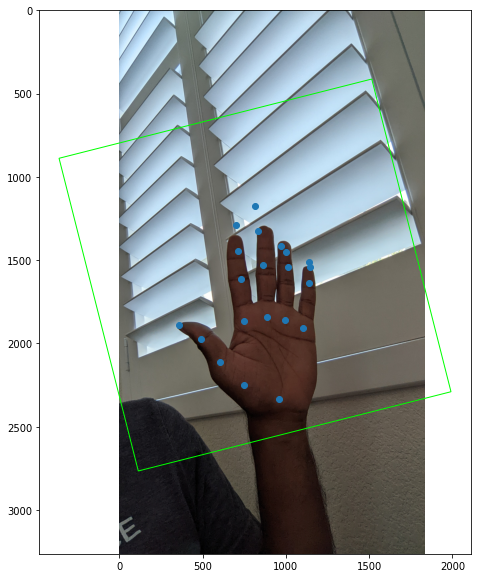

In [22]:
kp, box = detector(img)

f,ax = plt.subplots(1,1, figsize=(10, 10))

ax.imshow(img)

ax.scatter(kp[:,0], kp[:,1])
ax.add_patch(Polygon(box, color="#00ff00", fill=False))